In [1]:
%pylab inline
from funciones import paralelo, diagonal, espirales_anidadas, entrenar_knn
import pandas as pd
from random import sample
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors, RadiusNeighborsClassifier
import random
import copy
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# EJ 1

In [2]:
df = pd.read_csv('/home/agustin/facultad/IntroML/curso/tp4/espirales_con_ruido/c_0.data')

In [3]:
y0 = df.iloc[:,2]
x0 = df.iloc[:,:2]

mask_validation = sample(list(np.arange(999)),120)
mask_train = np.delete(np.arange(999),mask_validation)

y_validation = y0.values[mask_validation]
x_validation = x0.values[mask_validation]

y_train = y0.values[mask_train]
x_train = x0.values[mask_train]

df_test = pd.read_csv('/home/agustin/facultad/IntroML/curso/tp4/espirales_con_ruido/c_0.data')
x_test = df_test.iloc[:,:2]
y_test = df_test.iloc[:,2]

In [4]:
warnings.filterwarnings("ignore")
krange = np.arange(1,50)
error_train, error_val, error_test, error_min, best_k, best_knn = entrenar_knn(krange, 
                                                                               x_train,y_train,
                                                                               x_validation,y_validation,
                                                                               x_test,y_test)

Text(0, 0.5, 'error')

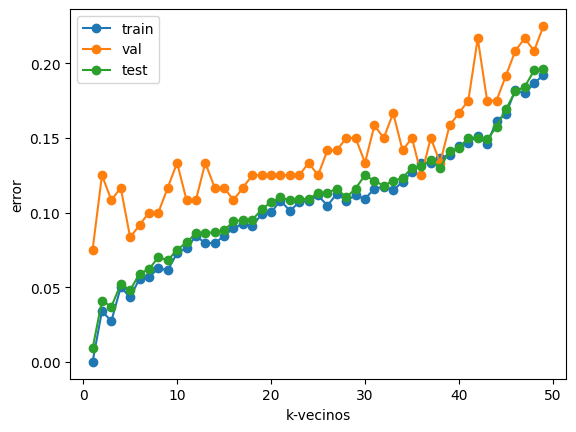

In [5]:
plt.plot(krange, error_train,label='train',marker='o')
plt.plot(krange, error_val,label='val',marker='o')
plt.plot(krange, error_test,label='test',marker='o')
plt.legend()
plt.xlabel('k-vecinos')
plt.ylabel('error')

Al hacer una curva los puntos en la espiral, al ir agrandando el area de busqueda uno rapidamente empieza a meter ruido siempre, asi que tiene sentido que el error aumente. 

## No entiendo que hay que hacer con lo de la espiral con ruido

# Ej 2

In [6]:
C = 0.78
n_train = 200
n_val   = 50
n_data   = n_train + n_val
n_test  = 10000
D_values = [2,4,8,16,32]
trainingsets = 20
krange = np.arange(2,40)
lrange = len(krange)

# Diagonal

In [7]:
error_train = np.zeros([len(D_values),lrange])
error_val = np.zeros([len(D_values),lrange])
error_test = np.zeros([len(D_values),lrange])

error_min_training_d = np.zeros(len(D_values))
error_min_test_d = np.zeros(len(D_values))
error_min_val_d = np.zeros(len(D_values))


k = 0 
for d in D_values:
    
    # genero datos
    data = diagonal(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = diagonal(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn(krange, 
                                                                               x_train,y_train,
                                                                               x_val,y_val,
                                                                               x_test,y_test)
    error_train[k,:] = np.array(error_train0)
    error_val[k,:] = np.array(error_val0)
    error_test[k,:] = np.array(error_test0)
          
        
    error_min_training_d[k] = error_train0[best_k]
    error_min_val_d[k] = error_val0[best_k]
    error_min_test_d[k] = error_test0[best_k]
        
    k = k + 1
    
#error_min_training_d = np.zeros(len(D_values))
#for i in range(len(D_values)):
#    error_min_training_d[i] = np.min(error_train[i,:])

#error_min_test_d = np.zeros(len(D_values))
#for i in range(len(D_values)):
#    error_min_test_d[i] = np.min(error_test[i,:])

In [8]:
# con un vecino
error_train_1_d = np.zeros([len(D_values)])
error_val_1_d = np.zeros([len(D_values)])
error_test_1_d = np.zeros([len(D_values)])

k = 0 

for d in D_values:
    data = diagonal(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = diagonal(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn([1], 
                                                                               x_train,y_train,
                                                                               x_val,y_val,
                                                                               x_test,y_test)
    error_train_1_d[k] = np.array(error_train0)
    error_val_1_d[k] = np.array(error_val0)
    error_test_1_d[k] = np.array(error_test0)
          
    k = k + 1


# paralelo

In [9]:
error_train = np.zeros([len(D_values),lrange])
error_val = np.zeros([len(D_values),lrange])
error_test = np.zeros([len(D_values),lrange])

error_min_training_p = np.zeros(len(D_values))
error_min_test_p = np.zeros(len(D_values))
error_min_val_p = np.zeros(len(D_values))


k = 0 
for d in D_values:
    
    # genero datos
    data = paralelo(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = paralelo(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn(krange, 
                                                                               x_train,y_train,
                                                                               x_val,y_val,
                                                                               x_test,y_test)
    error_train[k,:] = np.array(error_train0)
    error_val[k,:] = np.array(error_val0)
    error_test[k,:] = np.array(error_test0)
    
    error_min_training_p[k] = error_train0[best_k]
    error_min_val_p[k] = error_val0[best_k]
    error_min_test_p[k] = error_test0[best_k]
          
    k = k + 1
    
#error_min_training_p = np.zeros(len(D_values))
#for i in range(len(D_values)):
#    error_min_training_p[i] = np.min(error_train[i,:])
#
#error_min_test_p = np.zeros(len(D_values))
#for i in range(len(D_values)):
#    error_min_test_p[i] = np.min(error_test[i,:])

In [10]:
# con un vecino
error_train_1_p = np.zeros([len(D_values)])
error_val_1_p = np.zeros([len(D_values)])
error_test_1_p = np.zeros([len(D_values)])

k = 0 

for d in D_values:
    data = paralelo(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = paralelo(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn([1], 
                                                                               x_train,y_train,
                                                                               x_val,y_val,
                                                                               x_test,y_test)
    error_train_1_p[k] = np.array(error_train0)
    error_val_1_p[k] = np.array(error_val0)
    error_test_1_p[k] = np.array(error_test0)
          
    k = k + 1


In [11]:
# resultados tp1

diag_t = np.loadtxt('../tp2/ej4_diagonal.txt')
para_t = np.loadtxt('../tp2/ej4_paralelo.txt')

# resultados tp2

diag_a = np.loadtxt('../tp2/ej5_diagonal.txt')
para_a = np.loadtxt('../tp2/ej5_paralelo.txt')

# resultados tp3

diag_n = np.loadtxt('../tp3/tp3_diagonal.txt')
para_n = np.loadtxt('../tp3/tp3_paralelo.txt')

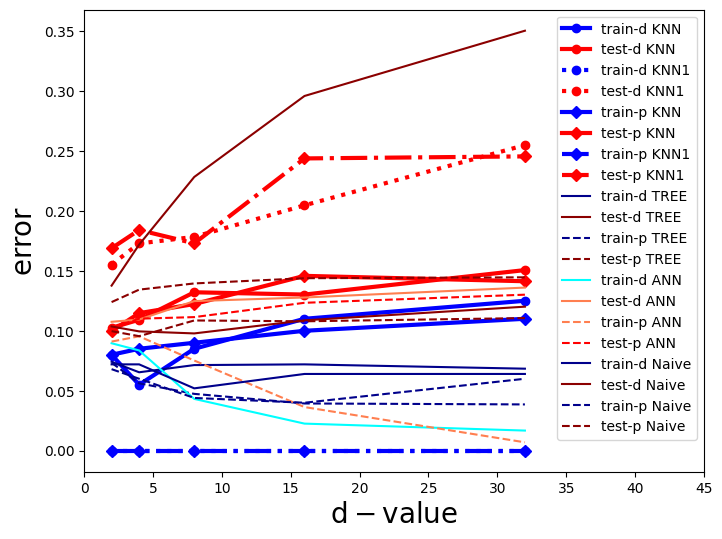

In [12]:
dimension = D_values
lw = 3
plt.figure(figsize=(8,6))

plt.plot(D_values,error_min_training_d,label='train-d KNN',marker='o',color='blue',lw=lw)
plt.plot(D_values,error_min_test_d,label='test-d KNN',marker='o',color='red',lw=lw)
plt.plot(D_values,error_train_1_d,label='train-d KNN1',marker='o',color='blue',ls='dotted',lw=lw)
plt.plot(D_values,error_test_1_d,label='test-d KNN1',marker='o',color='red',ls='dotted',lw=lw)

plt.plot(D_values,error_min_training_p,label='train-p KNN',marker='D',color='blue',lw=lw)
plt.plot(D_values,error_min_test_p,label='test-p KNN',marker='D',color='red',lw=lw)
plt.plot(D_values,error_train_1_p,label='train-p KNN1',marker='D',color='blue',ls='dashdot',lw=lw)
plt.plot(D_values,error_test_1_p,label='test-p KNN1',marker='D',color='red',ls='dashdot',lw=lw)


plt.plot(D_values,diag_t[:,1],label='train-d TREE',color='darkblue')
plt.plot(D_values,diag_t[:,2],label='test-d TREE',color='darkred')
plt.plot(D_values,para_t[:,1],label='train-p TREE',color='darkblue',ls='--')
plt.plot(D_values,para_t[:,2],label='test-p TREE',color='darkred',ls='--')

plt.plot(D_values,diag_a[:,1],label='train-d ANN',color='cyan')
plt.plot(D_values,diag_a[:,2],label='test-d ANN',color='coral')
plt.plot(D_values,para_a[:,1],label='train-p ANN',color='coral',ls='--')
plt.plot(D_values,para_a[:,2],label='test-p ANN',color='red',ls='--')

plt.plot(D_values,diag_n[:,1],label='train-d Naive',color='darkblue')
plt.plot(D_values,diag_n[:,2],label='test-d Naive',color='darkred')
plt.plot(D_values,para_n[:,1],label='train-p Naive',color='darkblue',ls='--')
plt.plot(D_values,para_n[:,2],label='test-p Naive',color='darkred',ls='--')


plt.xlabel('$\\rm d-value$',size=20)
plt.ylabel('$\\rm error$',size=20)

plt.xlim(0,45)

plt.legend(fontsize=10)

Las clasificacion van empeorando en funcion de la dimension. Esto puede entenderse ya que la "densidad" de puntos decae rapidamente con la dimension, y este metodo de clasificacion es muy sencible a la densidad de puntos. 
Cuando se clasifica con vecinos pero buscando el vecino optimo los errores son considerablemente mejores, aunque pareciera haber una tendencia de que el conjunto paralelo se clasifica peor que el diagonal ? (es super marginal, no creo que sea asi). Los errores de entrenamiento cuando se clasifica con un vecino dan cero, pero esto es porque se encuentra como primer vecino a uno mismo, por lo cual da siempre bien la clasificacion.

In [13]:
error_min_training_d_u = error_min_training_d
error_min_test_d_u = error_min_test_d
error_train_1_d_u = error_train_1_d
error_test_1_d_u = error_test_1_d

error_min_training_p_u = error_min_training_p
error_min_test_p_u = error_min_test_p
error_train_1_p_u = error_train_1_p
error_test_1_p_u = error_test_1_p

# Ej 3

In [14]:
C = 0.78
n_train = 200
n_val   = 50
n_data   = n_train + n_val
n_test  = 10000
D_values = [2,4,8,16,32]
krange = np.arange(2,50)
lrange = len(krange)

In [15]:
def entrenar_knn_dist(krange, x_train,y_train,x_validation,y_validation,x_test,y_test):
    
    errores = []
    error_min = 999
    best_acc = -99
    
    error_train = []
    error_val = []
    error_test = []
    for k in krange:
               
        knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
        knn.fit(x_train,y_train)
        
        prediccion = knn.predict(x_train)
        correctos, = np.where(prediccion == y_train)
        accuracy_train = len(correctos)/len(y_train)
        
        prediccion = knn.predict(x_validation)
        correctos, = np.where(prediccion == y_validation)
        accuracy_val = len(correctos)/len(y_validation)
               
        if accuracy_val>best_acc:
            error_min = 1 - accuracy_val
            best_acc = accuracy_val
            best_k   = k
            best_knn = copy.deepcopy(knn)
            
        # predigo las clases de test
        prediccion = knn.predict(x_test)
        correctos, = np.where(prediccion == y_test)
        accuracy_test = len(correctos)/len(y_test)
        
        error_train.append(1 - accuracy_train)
        error_val.append(1 - accuracy_val)
        error_test.append(1 - accuracy_test)
        
    return error_train, error_val, error_test, error_min, best_k, best_knn

In [16]:
error_train_d = np.zeros([len(D_values),lrange])
error_val_d = np.zeros([len(D_values),lrange])
error_test_d = np.zeros([len(D_values),lrange])

error_min_training_d = np.zeros(len(D_values))
error_min_test_d = np.zeros(len(D_values))
error_min_val_d = np.zeros(len(D_values))

k = 0 
for d in D_values:
    
    # genero datos
    data = diagonal(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = diagonal(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn_dist(krange, 
                                                                               x_train,y_train,
                                                                               x_val,y_val,
                                                                               x_test,y_test)
    #print(np.shape(error_train0),best_k)
    
    error_train_d[k,:] = np.array(error_train0)
    error_val_d[k,:] = np.array(error_val0)
    error_test_d[k,:] = np.array(error_test0)
    
    error_min_training_d[k] = error_train0[best_k]
    error_min_val_d[k] = error_val0[best_k]
    error_min_test_d[k] = error_test0[best_k]
          
    k = k + 1
    
#error_min_training_d = np.zeros(len(D_values))
#for i in range(len(D_values)):
#    error_min_training_d[i] = np.min(error_train[i,:])
#
#error_min_test_d = np.zeros(len(D_values))
#for i in range(len(D_values)):
#    error_min_test_d[i] = np.min(error_test[i,:])

In [17]:
# con un 50 vecino
error_train_50_d = np.zeros([len(D_values)])
error_val_50_d = np.zeros([len(D_values)])
error_test_50_d = np.zeros([len(D_values)])

k = 0 

for d in D_values:
    data = diagonal(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = diagonal(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn_dist([50], 
                                                                               x_train,y_train,
                                                                               x_val,y_val,
                                                                               x_test,y_test)
    error_train_50_d[k] = np.array(error_train0)
    error_val_50_d[k] = np.array(error_val0)
    error_test_50_d[k] = np.array(error_test0)
          
        
    k = k + 1


In [18]:
error_train_p = np.zeros([len(D_values),lrange])
error_val_p = np.zeros([len(D_values),lrange])
error_test_p = np.zeros([len(D_values),lrange])

error_min_training_p = np.zeros(len(D_values))
error_min_test_p = np.zeros(len(D_values))
error_min_val_p = np.zeros(len(D_values))

k = 0 
for d in D_values:
    
    # genero datos
    data = paralelo(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = paralelo(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn_dist(krange, 
                                                                               x_train,y_train,
                                                                               x_val,y_val,
                                                                               x_test,y_test)
    #print(np.shape(error_train0),best_k)
    
    error_train_p[k,:] = np.array(error_train0)
    error_val_p[k,:] = np.array(error_val0)
    error_test_p[k,:] = np.array(error_test0)
    
    error_min_training_p[k] = error_train0[best_k]
    error_min_val_p[k] = error_val0[best_k]
    error_min_test_p[k] = error_test0[best_k]
          
    k = k + 1

In [19]:
# con un 50 vecino
error_train_50_p = np.zeros([len(D_values)])
error_val_50_p = np.zeros([len(D_values)])
error_test_50_p = np.zeros([len(D_values)])

k = 0 

for d in D_values:
    data = paralelo(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = paralelo(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn_dist([50], 
                                                                               x_train,y_train,
                                                                               x_val,y_val,
                                                                               x_test,y_test)
    error_train_50_p[k] = np.array(error_train0)
    error_val_50_p[k] = np.array(error_val0)
    error_test_50_p[k] = np.array(error_test0)
          
        
    k = k + 1

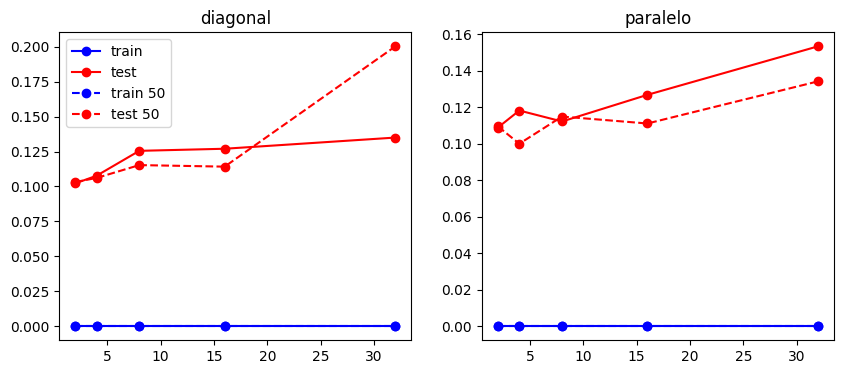

In [20]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.title('diagonal')
plt.plot(D_values,error_min_training_d,label='train',marker='o',color='blue')
plt.plot(D_values,error_min_test_d,label='test',marker='o',color='red')

plt.plot(D_values,error_train_50_d,label='train 50',marker='o',color='blue',ls='dashed')
plt.plot(D_values,error_test_50_d,label='test 50',marker='o',color='red',ls='dashed')

plt.legend()

plt.subplot(122)
plt.title('paralelo')
plt.plot(D_values,error_min_training_p,label='train',marker='o',color='blue')
plt.plot(D_values,error_min_test_p,label='test',marker='o',color='red')

plt.plot(D_values,error_train_50_p,label='train 50',marker='o',color='blue',ls='dashed')
plt.plot(D_values,error_test_50_p,label='test 50',marker='o',color='red',ls='dashed')


In [21]:
p3_train_p = error_min_training_p
p3_test_p = error_min_test_p

p3_train_d = error_min_training_d
p3_test_d = error_min_test_d

p3_train_50_d = error_train_50_p
p3_test_50_d = error_test_50_p

p3_train_50_d = error_train_50_d
p3_test_50_d = error_test_50_d

los dos entrenamientos dan cero de error, porque siempre encuentro un punto con distancia cero que me tira el peso a infinito. Comparando el error para los dos conjuntos de entrenamiento, entrenar buscando el k optimo arroja peores resultados, lo cual esta claramente mal.. Tiene que ver con que estoy teniendo errores muy grandes en el set de validacion (se ve en el plot que sigue) entonces elegir el mejor k buscando el mejor error en el set de validacion sigue dandome errores grandes. Claramente estoy haciendo algo mal. 

### Ahora comparo todo en 32 dimensiones

In [22]:
def entrenar_knn_unif(krange, x_train,y_train,x_validation,y_validation,x_test,y_test):
    
    errores = []
    error_min = 999
    best_acc = -99
    
    error_train = []
    error_val = []
    error_test = []
    for k in krange:
               
        knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
        knn.fit(x_train,y_train)
        
        prediccion = knn.predict(x_train)
        correctos, = np.where(prediccion == y_train)
        accuracy_train = len(correctos)/len(y_train)
        
        prediccion = knn.predict(x_validation)
        correctos, = np.where(prediccion == y_validation)
        accuracy_val = len(correctos)/len(y_validation)
               
        if accuracy_val>best_acc:
            error_min = 1 - accuracy_val
            best_acc = accuracy_val
            best_k   = k
            best_knn = copy.deepcopy(knn)
            
        # predigo las clases de test
        prediccion = knn.predict(x_test)
        correctos, = np.where(prediccion == y_test)
        accuracy_test = len(correctos)/len(y_test)
        
        error_train.append(1 - accuracy_train)
        error_val.append(1 - accuracy_val)
        error_test.append(1 - accuracy_test)
        
    return error_train, error_val, error_test, error_min, best_k, best_knn

In [23]:
error_train_d = np.zeros([lrange])
error_val_d = np.zeros([lrange])
error_test_d = np.zeros([lrange])

k = 0 
d = 32
    
# genero datos
data = diagonal(d,n_data,C)
y_data = data['clases']#.values
x_data = data.drop(['clases'],axis = 1)#.values
#separo en train y validation
mask_validation = sample(list(np.arange(n_data)),n_val)
mask_train = np.delete(np.arange(n_data),mask_validation)
y_val = (y_data.values[mask_validation])
x_val = (x_data.values[mask_validation])
y_train = (y_data.values[mask_train])
x_train = (x_data.values[mask_train])

# datos test
test = diagonal(d,n_test,C)
y_test = test['clases'].values
x_test = test.drop(['clases'],axis = 1).values

error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn_dist(krange, 
                                                                           x_train,y_train,
                                                                           x_val,y_val,
                                                                           x_test,y_test)
error_train_d_d= np.array(error_train0)
error_val_d_d = np.array(error_val0)
error_test_d_d= np.array(error_test0)

error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn_unif(krange, 
                                                                           x_train,y_train,
                                                                           x_val,y_val,
                                                                           x_test,y_test)
error_train_u_d = np.array(error_train0)
error_val_u_d = np.array(error_val0)
error_test_u_d = np.array(error_test0)

# paralelo

In [24]:
error_train_d = np.zeros([lrange])
error_val_d = np.zeros([lrange])
error_test_d = np.zeros([lrange])

k = 0 
d = 32
    
# genero datos
data = paralelo(d,n_data,C)
y_data = data['clases']#.values
x_data = data.drop(['clases'],axis = 1)#.values
#separo en train y validation
mask_validation = sample(list(np.arange(n_data)),n_val)
mask_train = np.delete(np.arange(n_data),mask_validation)
y_val = (y_data.values[mask_validation])
x_val = (x_data.values[mask_validation])
y_train = (y_data.values[mask_train])
x_train = (x_data.values[mask_train])

# datos test
test = paralelo(d,n_test,C)
y_test = test['clases'].values
x_test = test.drop(['clases'],axis = 1).values

error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn_dist(krange, 
                                                                           x_train,y_train,
                                                                           x_val,y_val,
                                                                           x_test,y_test)
error_train_d_p= np.array(error_train0)
error_val_d_p = np.array(error_val0)
error_test_d_p= np.array(error_test0)

error_train0, error_val0, error_test0, error_min, best_k, best_knn = entrenar_knn_unif(krange, 
                                                                           x_train,y_train,
                                                                           x_val,y_val,
                                                                           x_test,y_test)
error_train_u_p = np.array(error_train0)
error_val_u_p = np.array(error_val0)
error_test_u_p = np.array(error_test0)

(-0.01, 0.3)

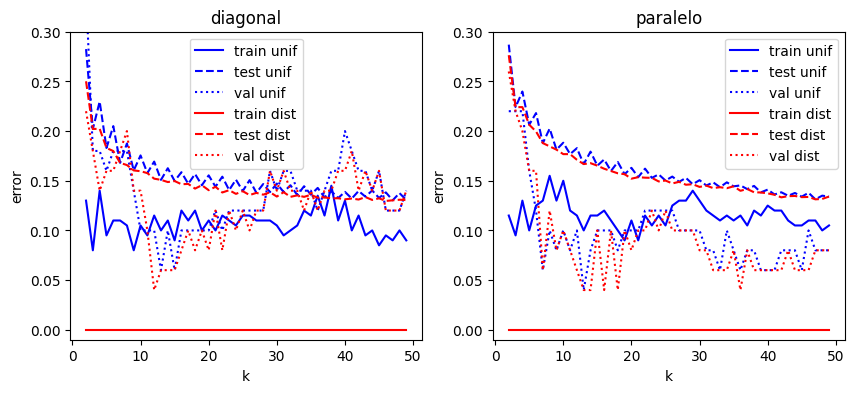

In [25]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.title('diagonal')
plt.plot(krange,error_train_u_d,color='blue',label='train unif')
plt.plot(krange,error_test_u_d,color='blue',ls='dashed',label='test unif')
plt.plot(krange,error_val_u_d,color='blue',ls='dotted',label='val unif')

plt.plot(krange,error_train_d_d,color='red',label='train dist')
plt.plot(krange,error_test_d_d,color='red',ls='dashed',label='test dist')
plt.plot(krange,error_val_d_d,color='red',ls='dotted',label='val dist')

plt.legend()
plt.xlabel('k')
plt.ylabel('error')
plt.ylim(-.01,.3)

plt.subplot(122)
plt.title('paralelo')
plt.plot(krange,error_train_u_p,color='blue',label='train unif')
plt.plot(krange,error_test_u_p,color='blue',ls='dashed',label='test unif')
plt.plot(krange,error_val_u_p,color='blue',ls='dotted',label='val unif')

plt.plot(krange,error_train_d_p,color='red',label='train dist')
plt.plot(krange,error_test_d_p,color='red',ls='dashed',label='test dist')
plt.plot(krange,error_val_d_p,color='red',ls='dotted',label='val dist')

plt.legend()
plt.xlabel('k')
plt.ylabel('error')
plt.ylim(-.01,.3)


Es como si entrenar pesando por distancia o uniformemente fuera similar en el caso de muchas dimensiones, aunque ligeramente mejor para el caso de pesar por distancia.

Tampoco se observan diferencias claras en cuanto a si se resolviera mejor el caso paralelo o diagonal (lo cual yo no esperaria que existan, ya que son el mismo problema pero "girado" y este metodo solo depende de las distancias). Se encuentra que los errores van mejorando de acuerdo a el numero de vecinos.   

# Ej 4

### ikeda

In [26]:
ntest = 2000

t1 = np.loadtxt('../tp2/ikeda.data')
t2 = np.loadtxt('../tp2/ikeda.test')

df_data = pd.DataFrame(t1)
df_test = pd.DataFrame(t2)

# entreno con 80  y valido con 20
train_size = 75

x_train = df_data.iloc[:train_size,:5]
y_train = df_data.iloc[:train_size,5]

x_valid = df_data.iloc[train_size:100,:5]
y_valid = df_data.iloc[train_size:100,5]

x_test = df_test.iloc[:ntest,:5]
y_test = df_test.iloc[:ntest,5]

In [27]:
def entrenar_regresor_u(krange, x_train,y_train,x_validation,y_validation,x_test,y_test):
    
    errores = []
    error_min = 999
    best_acc = -99
    
    error_train = []
    error_val = []
    error_test = []
    for k in krange:
               
        knn = KNeighborsRegressor(n_neighbors = k, weights = 'uniform')
        knn.fit(x_train,y_train)
        
        prediccion = knn.predict(x_train)
        etrain = mean_squared_error(prediccion,y_train)
        #print(prediccion-y_train)
        prediccion = knn.predict(x_validation)
        evalid = mean_squared_error(prediccion,y_validation)
        
        if evalid<error_min:
            error_min = evalid
            best_k   = k
            best_knn = copy.deepcopy(knn)
            
        # predigo las clases de test
        prediccion = knn.predict(x_test)
        etest = mean_squared_error(prediccion,y_test)
        
        error_train.append(etrain)
        error_val.append(evalid)
        error_test.append(etest)
        
    return error_train, error_val, error_test, error_min, best_k, best_knn

In [28]:
def entrenar_regresor_d(krange, x_train,y_train,x_validation,y_validation,x_test,y_test):
    
    errores = []
    error_min = 999
    best_acc = -99
    
    error_train = []
    error_val = []
    error_test = []
    for k in krange:
               
        knn = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
        knn.fit(x_train,y_train)
        
        prediccion = knn.predict(x_train)
        etrain = mean_squared_error(prediccion,y_train)
        #print(prediccion-y_train)
        prediccion = knn.predict(x_validation)
        evalid = mean_squared_error(prediccion,y_validation)
        
        if evalid<error_min:
            error_min = evalid
            best_k   = k
            best_knn = copy.deepcopy(knn)
            
        # predigo las clases de test
        prediccion = knn.predict(x_test)
        etest = mean_squared_error(prediccion,y_test)
        
        error_train.append(etrain)
        error_val.append(evalid)
        error_test.append(etest)
        
    return error_train, error_val, error_test, error_min, best_k, best_knn

In [29]:
krange = np.arange(1,20)
error_train_u_ik, error_val_u_ik, error_test_u_ik, error_min, best_k, best_knn = entrenar_regresor_u(krange, 
                                                                           x_train,y_train,
                                                                           x_valid,y_valid,
                                                                           x_test,y_test)

error_train_d_ik, error_val_d_ik, error_test_d_ik, error_min, best_k, best_knn = entrenar_regresor_d(krange, 
                                                                           x_train,y_train,
                                                                           x_valid,y_valid,
                                                                           x_test,y_test)

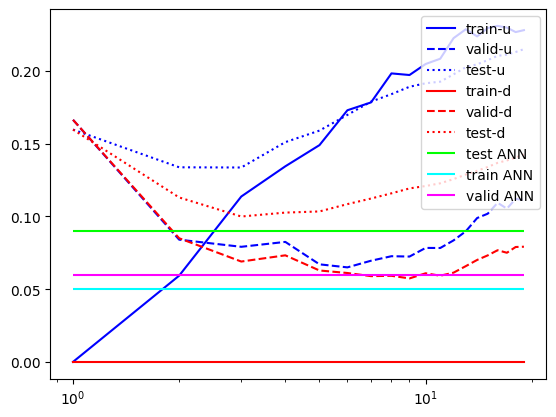

In [30]:
plt.plot(krange,error_train_u_ik,label='train-u',color='blue')
plt.plot(krange,error_val_u_ik,label='valid-u',color='blue',ls='dashed')
plt.plot(krange,error_test_u_ik,label='test-u',color='blue',ls='dotted')

plt.plot(krange,error_train_d_ik,label='train-d',color='red')
plt.plot(krange,error_val_d_ik,label='valid-d',color='red',ls='dashed')
plt.plot(krange,error_test_d_ik,label='test-d',color='red',ls='dotted')

plt.hlines(y = 0.09, xmin = np.min(krange), xmax = np.max(krange), label = 'test ANN', color='lime')
plt.hlines(y = 0.05, xmin = np.min(krange), xmax = np.max(krange), label = 'train ANN', color='cyan')
plt.hlines(y = 0.06, xmin = np.min(krange), xmax = np.max(krange), label = 'valid ANN', color='magenta')

plt.semilogx()
plt.legend(loc='upper right')

se ve que el pesado por la distancia tiene mejor desenpeño que el pesar uniformemente. Lo cual es razonable. Para el conjunto de entrenamiento pesado por distancia vemos que el error es cero ya que siempre se encuentra como primer vecino a el dato que estoy buscando clasificar y eso va a generar una distancia de cero y un peso de infinito para el dato. Pareceria que el caso de pesar con la distancia genera resultados muy estables y funciona muy bien desde el 3 o 4 vecino. Las lineas horizontales muestran los errores tipicos obtenidos para regresiones con redes neuronales (400 evaluaciones, learning rate = 0.01 y momento = 0.9). Las redes parecieran funcionar mejor, aunque no se me ocurre porque. 

### Sunspots

In [31]:
data = pd.read_csv('../tp2/ssp.data',header=None)
test = pd.read_csv('../tp2/ssp.test',header=None)

x_data = data.iloc[:,:12]
y_data = data.iloc[:,12]

x_test = test.iloc[:,:12]
y_test = test.iloc[:,12]

x_train,x_valid, y_train, y_valid= train_test_split(data.iloc[:,:12],data.iloc[:,12],
                                                    random_state=42, test_size=.3)

In [32]:
krange = np.arange(1,115)
error_train_u_sp, error_val_u_sp, error_test_u_sp, error_min, best_k, best_knn = entrenar_regresor_u(krange, 
                                                                           x_train,y_train,
                                                                           x_valid,y_valid,
                                                                           x_test,y_test)

error_train_d_sp, error_val_d_sp, error_test_d_sp, error_min, best_k, best_knn = entrenar_regresor_d(krange, 
                                                                           x_train,y_train,
                                                                           x_valid,y_valid,
                                                                           x_test,y_test)

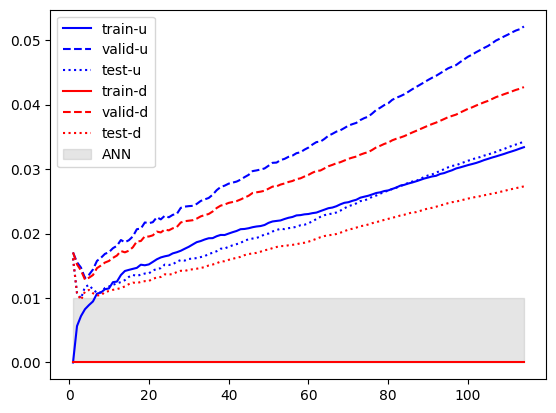

In [33]:
plt.plot(krange,error_train_u_sp,label='train-u',color='blue')
plt.plot(krange,error_val_u_sp,label='valid-u',color='blue',ls='dashed')
plt.plot(krange,error_test_u_sp,label='test-u',color='blue',ls='dotted')

plt.plot(krange,error_train_d_sp,label='train-d',color='red')
plt.plot(krange,error_val_d_sp,label='valid-d',color='red',ls='dashed')
plt.plot(krange,error_test_d_sp,label='test-d',color='red',ls='dotted')

plt.fill_between(krange, 0.01, 0, color='grey', alpha=.2, label='ANN')
#plt.semilogy()
plt.legend()

Nuevamente observamos para este problema mejores resultados al pesar por la distancia. Si bien los errores son bajos, no se observa una convergencia en ningun numero de vecinos. La región sombreada indica el rango de los errores para redes neuronales (lrate = 0.05, pmom  = 0.3, gamma = 1e-4, 4000 evaluaciones). 

# Ej 5

In [46]:
from sklearn.neighbors import KDTree

C = 0.78
n_train = 200
n_val   = 50
n_data   = n_train + n_val
n_test  = 10000
D_values = [2,4,8,16,32]

In [47]:
def entrenar_rnc_u(radio, x_train,y_train,x_validation,y_validation,x_test,y_test):
    
    errores = []
    error_min = 999
    best_acc = -99
    
    #error_train = []
    #error_val = []
    #error_test = []
    
               
    knn = RadiusNeighborsClassifier(radius = radio, weights='uniform', 
                                    outlier_label='most_frequent')  
    knn.fit(x_train,y_train)
        
    prediccion = knn.predict(x_train)
    correctos, = np.where(prediccion == y_train)
    accuracy_train = len(correctos)/len(y_train)
        
    prediccion = knn.predict(x_validation)
    correctos, = np.where(prediccion == y_validation)
    accuracy_val = len(correctos)/len(y_validation)
               
    #if accuracy_val>best_acc:
    #        error_min = 1 - accuracy_val
    #        best_k   = k
    #        best_knn = copy.deepcopy(knn)
            
    # predigo las clases de test
    prediccion = knn.predict(x_test)
    correctos, = np.where(prediccion == y_test)
    accuracy_test = len(correctos)/len(y_test)
        
    error_train = (1 - accuracy_train)
    error_val = (1 - accuracy_val)
    error_test= (1 - accuracy_test)
        
    return error_train, error_val, error_test, knn #, error_min, best_k, best_knn

In [48]:
def entrenar_rnc_d(radio, x_train,y_train,x_validation,y_validation,x_test,y_test):
    
    errores = []
    error_min = 999
    best_acc = -99
    
    #error_train = []
    #error_val = []
    #error_test = []
    
               
    knn = RadiusNeighborsClassifier(radius = radio, weights='distance', 
                                    outlier_label='most_frequent')  
    knn.fit(x_train,y_train)
        
    prediccion = knn.predict(x_train)
    correctos, = np.where(prediccion == y_train)
    accuracy_train = len(correctos)/len(y_train)
        
    prediccion = knn.predict(x_validation)
    correctos, = np.where(prediccion == y_validation)
    accuracy_val = len(correctos)/len(y_validation)
               
    #if accuracy_val>best_acc:
    #        error_min = 1 - accuracy_val
    #        best_k   = k
    #        best_knn = copy.deepcopy(knn)
            
    # predigo las clases de test
    prediccion = knn.predict(x_test)
    correctos, = np.where(prediccion == y_test)
    accuracy_test = len(correctos)/len(y_test)
        
    error_train = (1 - accuracy_train)
    error_val = (1 - accuracy_val)
    error_test= (1 - accuracy_test)
        
    return error_train, error_val, error_test, knn #, error_min, best_k, best_knn

In [49]:
error_train_u_d = np.zeros([len(D_values)])
error_val_u_d = np.zeros([len(D_values)])
error_test_u_d = np.zeros([len(D_values)])

error_train_d_d = np.zeros([len(D_values)])
error_val_d_d = np.zeros([len(D_values)])
error_test_d_d = np.zeros([len(D_values)])

k = 0 

for d in D_values:
    
    # genero datos
    
    data = diagonal(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = diagonal(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    # busco radio de busqueda
    
    tree = KDTree(x_train)
    distancias, indices = tree.query(x_train, k = len(x_train))
    radio = np.percentile(distancias[0,:], 50)
    #radio = np.min(distancias[0,:])
    
    error_train, error_val, error_test, knn = entrenar_rnc_u(radio, x_train,y_train,
                                                           x_val,y_val,
                                                           x_test,y_test )
    
    error_train_u_d[k] = error_train
    error_val_u_d[k] = error_val
    error_test_u_d[k] = error_test
    
    error_train, error_val, error_test, knn = entrenar_rnc_d(radio, x_train,y_train,
                                                           x_val,y_val,
                                                           x_test,y_test )
    
    error_train_d_d[k] = error_train
    error_val_d_d[k] = error_val
    error_test_d_d[k] = error_test
    
    k = k + 1

In [50]:
error_train_u_p = np.zeros([len(D_values)])
error_val_u_p = np.zeros([len(D_values)])
error_test_u_p = np.zeros([len(D_values)])

error_train_d_p = np.zeros([len(D_values)])
error_val_d_p = np.zeros([len(D_values)])
error_test_d_p = np.zeros([len(D_values)])

k = 0 

for d in D_values:
    
    # genero datos
    
    data = paralelo(d,n_data,C)
    y_data = data['clases']#.values
    x_data = data.drop(['clases'],axis = 1)#.values
    #separo en train y validation
    mask_validation = sample(list(np.arange(n_data)),n_val)
    mask_train = np.delete(np.arange(n_data),mask_validation)

    y_val = (y_data.values[mask_validation])
    x_val = (x_data.values[mask_validation])
    y_train = (y_data.values[mask_train])
    x_train = (x_data.values[mask_train])
    
    # datos test
    test = paralelo(d,n_test,C)
    y_test = test['clases'].values
    x_test = test.drop(['clases'],axis = 1).values
    
    # busco radio de busqueda
    
    tree = KDTree(x_train)
    distancias, indices = tree.query(x_train, k = len(x_train))
    radio = np.percentile(distancias[0,:], 50)
    #radio = np.min(distancias[0,:])
    
    error_train, error_val, error_test, knn = entrenar_rnc_u(radio, x_train,y_train,
                                                           x_val,y_val,
                                                           x_test,y_test )
    
    error_train_u_p[k] = error_train
    error_val_u_p[k] = error_val
    error_test_u_p[k] = error_test
    
    error_train, error_val, error_test, knn = entrenar_rnc_d(radio, x_train,y_train,
                                                           x_val,y_val,
                                                           x_test,y_test )
    
    error_train_d_p[k] = error_train
    error_val_d_p[k] = error_val
    error_test_d_p[k] = error_test
    
    k = k + 1

(-0.01, 0.2)

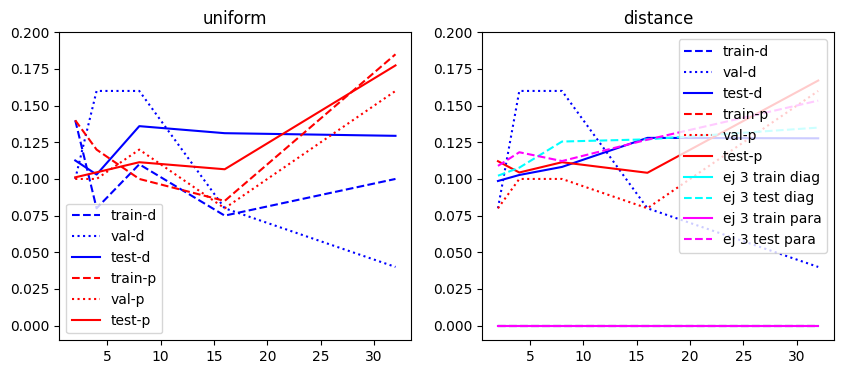

In [51]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.title('uniform')
plt.plot(D_values,error_train_u_d,label='train-d',color='blue',ls='dashed')
plt.plot(D_values,error_val_u_d,label='val-d',color='blue',ls='dotted')
plt.plot(D_values,error_test_u_d,label='test-d',color='blue')

plt.plot(D_values,error_train_u_p,label='train-p',color='red',ls='dashed')
plt.plot(D_values,error_val_u_p,label='val-p',color='red',ls='dotted')
plt.plot(D_values,error_test_u_p,label='test-p',color='red')
plt.ylim(-.01,.2)

plt.legend()

plt.subplot(122)
plt.title('distance')
plt.plot(D_values,error_train_d_d,label='train-d',color='blue',ls='dashed')
plt.plot(D_values,error_val_d_d,label='val-d',color='blue',ls='dotted')
plt.plot(D_values,error_test_d_d,label='test-d',color='blue')

plt.plot(D_values,error_train_d_p,label='train-p',color='red',ls='dashed')
plt.plot(D_values,error_val_d_p,label='val-p',color='red',ls='dotted')
plt.plot(D_values,error_test_d_p,label='test-p',color='red')

plt.plot(D_values,p3_train_d,label='ej 3 train diag',color='cyan')
plt.plot(D_values,p3_test_d,label='ej 3 test diag',color='cyan',ls='dashed')
plt.plot(D_values,p3_train_p,label='ej 3 train para',color='magenta')
plt.plot(D_values,p3_test_p,label='ej 3 test para',color='magenta',ls='dashed')

plt.legend()
plt.ylim(-.01,.2)

Aca de nuevo no estoy encontrando diferencias claras entre pesar uniformemente o en funcion de la distancia. Se me ocurre que como este clasificacion es muy sencible a el numero de datos, para mejorar la clasificacion necesitaria aumentar el tamaño de el set de entrenamiento y validacion, ya que son chicos (200 y 50).

Se me ocurre que en realidad este problema de las gauseanas es poco sencible debido a que las dos clases estan muy bien definidas, y solo ocurre confusion en una region de "interseccion" de la

Cuando pruebo aumentar el tamaño de los conjuntos de entrenamiento y validacion, encuentre resultados ligeramente mejores para la clasificación pesando por distancia. 

In [ ]:
#p3_train_p = error_min_training_p
#p3_test_p = error_min_test_p
#
#p3_train_d = error_min_training_d
#p3_test_d = error_min_test_d
#
#p3_train_50_d = error_train_50_p
#p3_test_50_d = error_test_50_p
#
#p3_train_50_d = error_train_50_d
#p3_test_50_d = error_test_50_d